From pyOpenMS [user guide](https://pyopenms.readthedocs.io/en/latest/user_guide/ms_data.html)

In [1]:
import pyopenms as oms
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import clear_output

In [2]:
# working directory
DIR = os.path.dirname(os.getcwd())
# directory where the mzML files are located
DATA_DIR = os.path.join(DIR, "data/ms_data/mzml")

# list of mzML files
mzml_files = [os.path.join(DATA_DIR, f) for f in os.listdir(DATA_DIR)]

print(f"{len(mzml_files)} mzML files found in {DATA_DIR}")
mzml_files[1]

290 mzML files found in /media/sf_vmshare/Projects/thesis_mbds/data/ms_data/mzml


'/media/sf_vmshare/Projects/thesis_mbds/data/ms_data/mzml/Blank11.mzML'

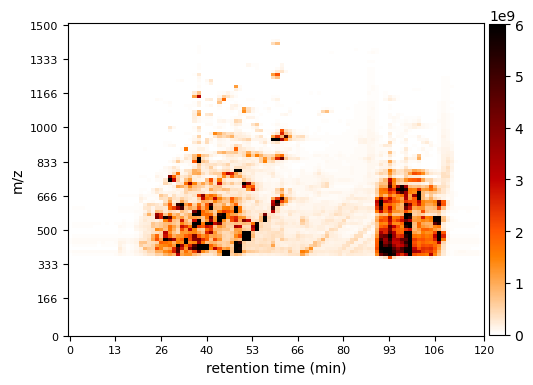

In [101]:
# test parameters

# find index of file to start at
filename = "N_A_t1_1.mzML"
# get start index
i = mzml_files.index(os.path.join(DATA_DIR, filename))
exp = oms.MSExperiment()
oms.MzMLFile().load(mzml_files[i], exp)
exp.getMaxRT()


def plot_spectra_2D_overview(exp, name=""):
    # set heatmap resolution. higher values take longer to compute
    rows = 200.0
    cols = 200.0
    exp.updateRanges()

    min_rt = exp.getMinRT()
    max_rt = exp.getMaxRT()
    min_mz = exp.getMinMZ()
    max_mz = 1500.0  # previously exp.getMaxMZ()

    bilip = oms.BilinearInterpolation()
    tmp = bilip.getData()
    tmp.resize(int(rows), int(cols), float())
    bilip.setData(tmp)
    bilip.setMapping_0(0.0, min_rt, rows - 1, max_rt)
    bilip.setMapping_1(
        0.0, min_mz, cols - 1, max_mz
    )  # 1700 as max value instead of exp.getMaxMZ()
    for spec in exp:
        if spec.getMSLevel() == 1:
            mzs, ints = spec.get_peaks()
            rt = spec.getRT()
            for i in range(0, len(mzs)):
                bilip.addValue(rt, mzs[i], ints[i])

    data = np.ndarray(shape=(int(cols), int(rows)), dtype=np.float64)
    for i in range(int(rows)):
        for j in range(int(cols)):
            data[i][j] = bilip.getData().getValue(i, j)

    plt.imshow(
        np.rot90(data),
        cmap="gist_heat_r",
        vmax=6e9,  # set maximum intensity value
        aspect=0.75,
    )  # change image aspect ratio with aspect = 0.75
    plt.xlabel("retention time (min)")
    plt.ylabel("m/z")
    plt.xticks(
        np.linspace(0, int(rows), 10, dtype=int),
        np.linspace(min_rt / 60, max_rt / 60, 10, dtype=int),
        fontsize=8,
    )
    plt.yticks(
        np.linspace(0, int(cols), 10, dtype=int),
        np.linspace(min_mz, max_mz, 10, dtype=int)[::-1],
        fontsize=8,
    )
    cb = plt.colorbar(shrink=0.84, pad=0.01)
    cb.ax.yaxis.set_offset_position("left")
    plt.title(name, loc="left")

    plt.show()


plot_spectra_2D_overview(exp)

In [102]:
## Function definitions
# generate ms vs. rt plot (2D plot)
def plot_spectra_2D_overview(exp, name=""):
    # set heatmap resolution. higher values take longer to compute
    rows = 400.0
    cols = 400.0
    exp.updateRanges()

    min_rt = exp.getMinRT()
    max_rt = exp.getMaxRT()
    min_mz = exp.getMinMZ()
    max_mz = 1500.0  # previously exp.getMaxMZ()

    bilip = oms.BilinearInterpolation()
    tmp = bilip.getData()
    tmp.resize(int(rows), int(cols), float())
    bilip.setData(tmp)
    bilip.setMapping_0(0.0, min_rt, rows - 1, max_rt)
    bilip.setMapping_1(
        0.0, min_mz, cols - 1, max_mz
    )  # 1700 as max value instead of exp.getMaxMZ()
    for spec in exp:
        if spec.getMSLevel() == 1:
            mzs, ints = spec.get_peaks()
            rt = spec.getRT()
            for i in range(0, len(mzs)):
                bilip.addValue(rt, mzs[i], ints[i])

    data = np.ndarray(shape=(int(cols), int(rows)), dtype=np.float64)
    for i in range(int(rows)):
        for j in range(int(cols)):
            data[i][j] = bilip.getData().getValue(i, j)

    plt.imshow(
        np.rot90(data),
        cmap="gist_heat_r",
        vmax=6e9,  # set maximum intensity value
        aspect=0.75,
    )  # change image aspect ratio with aspect = 0.75
    plt.xlabel("retention time (min)")
    plt.ylabel("m/z")
    plt.xticks(
        np.linspace(0, int(rows), 10, dtype=int),
        np.linspace(min_rt / 60, max_rt / 60, 10, dtype=int),
        fontsize=8,
    )
    plt.yticks(
        np.linspace(0, int(cols), 10, dtype=int),
        np.linspace(min_mz, max_mz, 10, dtype=int)[::-1],
        fontsize=8,
    )
    cb = plt.colorbar(shrink=0.84, pad=0.01)
    cb.ax.yaxis.set_offset_position("left")
    plt.title(name, loc="left")

    return plt


def plot_wrapper(files, start: int = 0, save: bool = False, out_dir: str = None):
    """Wrapper function to loop through files and plot spectra.

    Args:
        files (list): List of mzML files.
        start (int): Index to start at.
        save (bool): Flag indicating whether to save the plots.
        out_dir (str): Output directory to save the plots (required if save=True).

    Returns:
        None
    """
    # set counter
    count = 0
    # loop through files
    for file in files[start:]:
        # Clear the previous output
        clear_output(wait=False)

        # Load mzML file
        name = (os.path.basename(file)).split(".")[0]
        exp = oms.MSExperiment()
        oms.MzMLFile().load(file, exp)

        # Plot spectra
        plt = plot_spectra_2D_overview(exp, name=name)

        # Save plot
        if save:
            # create output directory if it doesn't exist
            if not os.path.exists(out_dir):
                os.makedirs(out_dir)
            plt.savefig(
                os.path.join(out_dir, f"{name}.png"), dpi=300, bbox_inches="tight"
            )
            plt.close()
            continue

        # Show plot
        plt.show()

        # increase counts
        count += 1

        # Ask user if they want to continue
        if input("Continue? Enter 'n' to stop: ") == "n":
            print(f"Number of files processed: {count}")
            break

In [103]:
# find index of file to start at
filename = "Blank15.mzML"
# get start index
i = mzml_files.index(os.path.join(DATA_DIR, filename))


# plot spectra
out_dir = os.path.join(DIR, "plots/mzml_plots")
plot_wrapper(mzml_files, start=0, save=True, out_dir=out_dir)